In [1]:
%cd ..
from src.utils import load_data, PathPlotter, BenchmarkPlotter, DistanceHistoryPlotter
from src.algos import *

NUM_STARTS = 5

/home/rafal/coding/coding/essa-tsp-metaheuristics


In [2]:
df = load_data('data/TSP_29.xlsx')

In [3]:
s = SimulatedAnnealing(temp=100, alpha=.5,reduce_func='reduce', n_iter=1000, verbose=False)
s.solve(df)

distance: 2614
algorithm: SIMULATED ANNEALING
Neighbourhood type: Swap
n_iter: 1000
reduction function: reduce
alpha: 0.5
initial temperatute: 100
solving time: 0.254 s
history: [6423, 6175, 6100, 6018, 5937, 5928, 5748, 5662, 5566, 5503, 5487, 5401, 5279, 5132, 5000, 5000, 4991, 4952, 4825, 4825, 4786, 4688, 4633, 4604, 4582, 4582, 4570, 4570, 4488, 4442, 4326, 4311, 4293, 4197, 4070, 4049, 3982, 3968, 3926, 3829, 3705, 3622, 3499, 3321, 3241, 3195, 3193, 3186, 3159, 3113, 3113, 2990, 2946, 2809, 2787, 2787, 2745, 2698, 2614]

In [4]:
n = NearestNeighbour(verbose=False)
n.solve(df, 14) 

distance: 2288
algorithm: NEAREST NEIGHBOUR

solving time: 0.014 s

In [5]:
t = TabuSearch(verbose=False, tabu_length=3 , n_iter=30)
t.solve(df)

distance: 2539
algorithm: TABU SEARCH
Neighbourhood type: Swap
n_iter: 30

solving time: 2.947 s
history: [6113, 5357, 4620, 4107, 3779, 3508, 3274, 3125, 2983, 2925, 2844, 2817, 2792, 2776, 2728, 2661, 2635, 2627, 2619, 2598, 2554, 2546, 2539, 2538, 2538, 2538, 2540, 2541, 2541, 2541, 2539]

In [6]:
h = HillClimbing(verbose=False, n_iter=25)
h.solve(df)

distance: 2571
algorithm: HILL CLIMBER
Neighbourhood type: Swap
n_iter: 25

solving time: 2.282 s
history: [5926, 5221, 4682, 4260, 3876, 3592, 3345, 3183, 3055, 2940, 2853, 2805, 2758, 2723, 2702, 2682, 2665, 2650, 2639, 2624, 2601, 2574, 2571]

In [7]:
a = MultistartAlgorithm()(HillClimbing, df, n_starts=NUM_STARTS, only_best=True, verbose=False, n_iter=25)
a

distance: 2368
algorithm: HILL CLIMBER
Neighbourhood type: Swap
n_iter: 25

solving time: 1.577 s
history: [5077, 4414, 3998, 3693, 3453, 3230, 2962, 2838, 2754, 2685, 2514, 2464, 2429, 2400, 2376, 2368]

In [8]:
b = MultistartAlgorithm()(SimulatedAnnealing, df, n_starts=NUM_STARTS, only_best=True, temp=1000, alpha=.9, n_iter=100, verbose=False)
b

distance: 3555
algorithm: SIMULATED ANNEALING
Neighbourhood type: Swap
n_iter: 100
reduction function: reduce
alpha: 0.9
initial temperatute: 1000
solving time: 0.026 s
history: [5648, 5429, 5222, 5114, 5052, 4989, 4642, 4477, 4445, 4414, 4315, 4260, 4260, 4176, 4150, 4038, 3891, 3817, 3555]

In [9]:
c = MultistartAlgorithm()(TabuSearch, df, n_starts=NUM_STARTS, only_best=True, verbose=False, tabu_length=3 , n_iter=30)
c

distance: 2299
algorithm: TABU SEARCH
Neighbourhood type: Swap
n_iter: 30

solving time: 2.919 s
history: [5761, 5018, 4377, 3784, 3571, 3373, 3187, 3024, 2942, 2863, 2801, 2755, 2687, 2640, 2536, 2502, 2492, 2419, 2399, 2396, 2388, 2353, 2318, 2320, 2327, 2334, 2327, 2325, 2333, 2336, 2299]

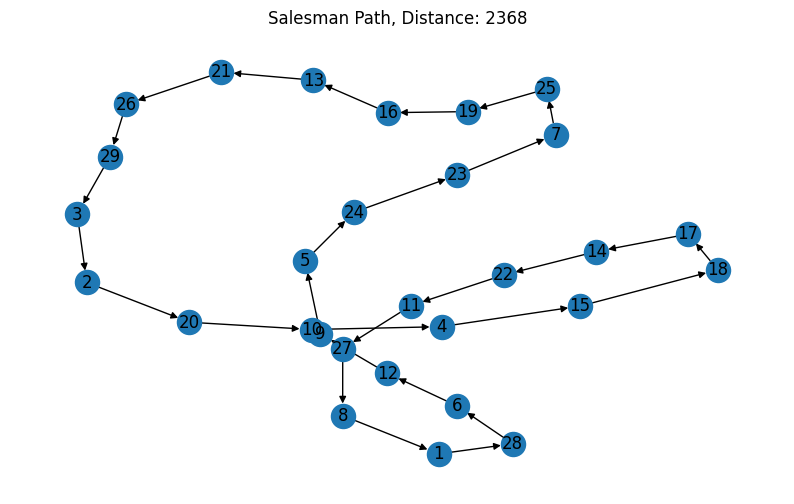

In [10]:
pp = PathPlotter()
pp.plot(a)

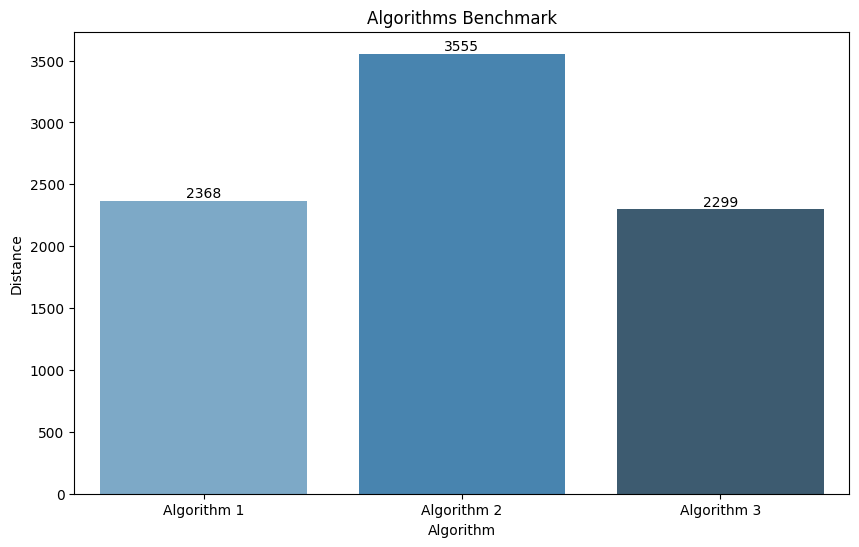

In [11]:
bp = BenchmarkPlotter()
bp.plot([a, b, c])

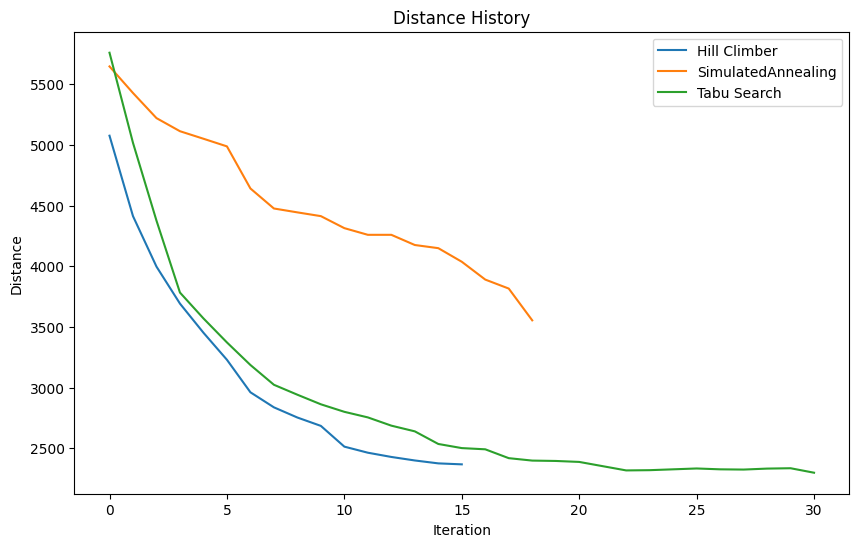

In [12]:
dhp = DistanceHistoryPlotter()
dhp.plot([a, b, c], labels = ["Hill Climber", "SimulatedAnnealing", "Tabu Search"])